# <h1> <font color='red'>DESAFIO:</font> Crie um arquivo com as bibliotecas utilizadas no projeto

Crie um arquivo requirements.txt com as bibliotecas que foram utilizadas durante a construção do projeto. Isso facilita para caso o projeto precise ser reproduzido em outra máquina ou ambiente virtual.

In [18]:
from imblearn.under_sampling import RandomUnderSampler
from pandas import json_normalize
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import plotly.express as px
import random
import seaborn as sns
import xgboost as xgb
from joblib import load
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st


# <h1> <font color='red'>DESAFIO:</font> Obtenha os dados para o treinamento do modelo

Ao fazer o deploy do modelo, você não precisa separar novamente em treino e teste. Em vez disso, você pode treinar o modelo com todos os dados disponíveis. Isso inclui o conjunto de treino original e o conjunto de teste que você separou anteriormente.

In [19]:
df_balanceado = pd.read_csv('/content/drive/MyDrive/Alura/Novexus/df_balanceado.csv')
df_balanceado

,tenure_0-5,account_Contract_MONTH-TO-MONTH,account_Contract_TWO YEAR,account_charges_0-500,Churn
0,0,0,0,0,0
1,0,1,0,0,0
2,1,1,0,1,1
3,0,1,0,0,1
4,1,1,0,1,1
...,...,...,...,...,...
5507,0,0,0,0,0
5508,0,1,0,0,1
5509,1,1,0,1,0
5510,0,0,1,0,0


Treinando o modelo com todo o conjunto inteiro de dados.

In [20]:
X = df_balanceado.drop('Churn', axis=1)
y = df_balanceado['Churn']

In [21]:
# Carregando o modelo
loaded_model = load('/content/drive/MyDrive/Alura/Novexus/best_lr_model.pkl')

# Utilizando o modelo para fazer previsões
predictions = loaded_model.predict(X)

In [22]:
# Calcula e exibe diversas métricas
print(f'Accuracy: {accuracy_score(y, predictions)}')
print(f'Recall: {recall_score(y, predictions)}')
print(f'Precision: {precision_score(y, predictions)}')
print(f'F1 Score: {f1_score(y, predictions)}')

Accuracy: 0.6346153846153846
Recall: 0.8889521640091116
Precision: 0.46183431952662723
F1 Score: 0.6078660436137072


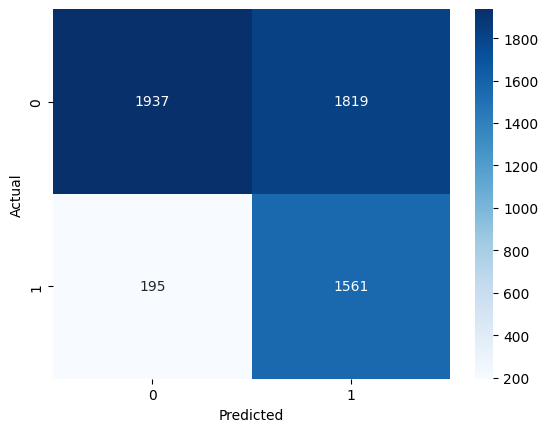

In [23]:
# Calcula a matriz de confusão
conf_matrix = confusion_matrix(y, predictions)

# Exibe a matriz de confusão como um heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
from sklearn.metrics import classification_report

# Gera e imprime o relatório de classificação
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.91      0.52      0.66      3756
           1       0.46      0.89      0.61      1756

    accuracy                           0.63      5512
   macro avg       0.69      0.70      0.63      5512
weighted avg       0.77      0.63      0.64      5512



# <h1> <font color='red'>DESAFIO:</font> Salvar o modelo de machine learning

Assim como feito na semana 2, certifique-se de salvar o modelo de machine learning para poder ser usado posteriormente na etapa de deploy.

In [25]:
# Salvando o modelo
with open('novexus_best_model_full_trained.pkl', 'wb') as file:
    pickle.dump(loaded_model, file)

# <h1> <font color='red'>DESAFIO:</font> Criar um arquivo .py com o treinamento do modelo de machine learning

Treinar o modelo de Machine Learning em arquivos .py, em vez de Jupyter Notebook, para implementação de deploy é importante devido a várias razões.

https://github.com/pfluiz/Alura_Challenge_Novexus/blob/main/novexus_completo.py

# <h1> <font color='red'>DESAFIO:</font> Construa a interface no streamlit para obter novos dados

Crie uma interface utilizando o Streamlit para que um funcionário da Novexus possa fornecer informações sobre um cliente específico.

https://novexus.streamlit.app/

# <h1> <font color='red'>DESAFIO:</font> Organize seu projeto em pastas

Melhore ainda mais a apresentação do seu projeto deixando-o mais organizado em pastas. Um exemplo de organização de projeto de data science pode ser encontrado em "Cookiecutter Data Science". Quando for utilizar esse material, lembre-se de adaptá-lo para as suas necessidad


# <h1> <font color='red'>DESAFIO:</font> Identifique suas conclusões


Acurácia (Accuracy): 0.635
* A acurácia é uma métrica geral que pode ser menos útil em problemas de Churn. Uma acurácia de 63.5% é moderada e sugere que há espaço para melhorias.

Recall (Sensibilidade): 0.889
* Em um contexto de Churn, um alto recall é especialmente valioso. Isso significa que <font color='green'>o modelo é bom em identificar clientes que estão em risco de churn, o que é crucial para ações preventivas</font>. Um recall de 88.9% é excelente e sugere que o modelo captura a maioria dos casos de churn.

Precisão: 0.462
* A precisão mais baixa significa que <font color='red'>o modelo também classifica muitos clientes como em risco de churn quando na verdade não estão</font>. Isso pode levar a custos adicionais para a empresa, como descontos ou promoções oferecidas desnecessariamente. Uma precisão de 46.2% pode ser uma área para melhoria.

F1 Score: 0.608
* O F1 Score tenta equilibrar precisão e recall. Um F1 Score de 60.8% indica que ainda há espaço para melhorar o equilíbrio entre essas duas métricas.

Matriz de Confusão
* Verdadeiros Positivos (TP): 1561
* Verdadeiros Negativos (TN): 1937
* Falsos Positivos (FP): 1819
* Falsos Negativos (FN): 195

Em um contexto de Churn:

* Verdadeiros Positivos são os casos em que o modelo corretamente identificou o churn.
* Verdadeiros Negativos são os casos em que o modelo corretamente identificou a retenção.
* Falsos Positivos são aqueles que o modelo incorretamente previu como churn, mas que na realidade são retenção.
* Falsos Negativos são aqueles que o modelo incorretamente previu como retenção, mas que na realidade são churn.

A escolha da métrica Recall partiu da preferência por minimizar os Falsos Negativos (FN) para capturar o máximo de clientes em risco de churn, o que o modelo já faz bem (FN = 195 é relativamente baixo comparado ao TP). No entanto, o alto número de Falsos Positivos (FP = 1819) pode ser uma preocupação, já que isso pode levar a gastos desnecessários em retenção de clientes que não estão em risco.

# <h1> <font color='blue'>EXTRA:</font> Probabilidade de churn

Realize a previsão da probabilidade de um cliente dar churn nos serviços da empresa e insira isso na interface após o funcionário da Novexus clicar no botão "previsão", criado anteriormente. Pesquise na documentação pelo método predict_proba.

# <h1> <font color='blue'>EXTRA:</font> Disponibilize o APP

Deixe seu app com acesso liberado para todos que tiverem a URL. A documentação Streamlit explica como fazer esse deploy do APP utilizando o github.

# <h1> <font color='blue'>EXTRA:</font> Compartilhe seu projeto com sua rede no linkedin.

Compartilhe seu projeto com seu repositório e o que foi aprendido no LinkedIn. Isso ajudará a dar mais visibilidade ao que você desenvolveu ao longo das semanas.